# 케라스 CNN CIFAR 10

- 50,000개의 학습데이터, 10,000개의 테스트 데이터로 구성

- 데이터 복잡도가 MNIST보다 훨씬 높은 특징이 있음
  - 신경망이 특징을 검출하기 어려움

  <img src="https://www.researchgate.net/profile/Jean_Elsner/publication/329969195/figure/fig1/AS:708799606317059@1546002403551/Images-from-the-CIFAR-10-13-dataset-and-their-corresponding-classes-CIFAR-10.ppm">


### modules import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np

### 데이터 로드 및 전처리

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 29s 0us/step


In [3]:
print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
print(y_test[5])

## 값은 label로 되어있음

[6]


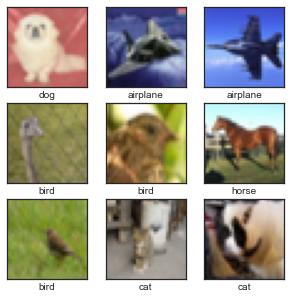

In [9]:
np.random.seed(777)

# label을 class명으로 묶어주자
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(50000, size = sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_full[idx])
    plt.xlabel(class_names[int(y_train_full[idx])])
    
plt.show()

In [10]:
x_mean = np.mean(x_train_full, axis = (0, 1, 2))
x_std = np.std(x_train_full, axis = (0, 1, 2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = .3)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 모델 구성 및 컴파일


In [17]:
def model_build():
    model = Sequential()
    
    input = Input(shape = (32, 32, 3))
    
    output = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')(input)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    
    # Fully-Connected Layer
    output = Flatten()(output)
    output = Dense(256, activation = 'relu')(output)
    output = Dense(128, activation = 'relu')(output)
    output = Dense(10, activation = 'softmax')(output)
    
    model = Model(inputs = [input], outputs = output)
    
    model.compile(optimizer = Adam(learning_rate = 1e-4),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['acc'])
    
    return model

In [18]:
model = model_build()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0   

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [19]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 256,
                   validation_data = (x_val, y_val))

Epoch 1/30
137/137 [==============================] - 10s 18ms/step - loss: 1.8647 - acc: 0.3349 - val_loss: 1.6259 - val_acc: 0.4175
Epoch 2/30
137/137 [==============================] - 2s 13ms/step - loss: 1.5017 - acc: 0.4655 - val_loss: 1.4557 - val_acc: 0.4799
Epoch 3/30
137/137 [==============================] - 2s 13ms/step - loss: 1.3690 - acc: 0.5146 - val_loss: 1.3469 - val_acc: 0.5220
Epoch 4/30
137/137 [==============================] - 2s 13ms/step - loss: 1.2892 - acc: 0.5451 - val_loss: 1.2868 - val_acc: 0.5442
Epoch 5/30
137/137 [==============================] - 2s 13ms/step - loss: 1.2298 - acc: 0.5681 - val_loss: 1.2233 - val_acc: 0.5731
Epoch 6/30
137/137 [==============================] - 2s 13ms/step - loss: 1.1749 - acc: 0.5877 - val_loss: 1.1822 - val_acc: 0.5867
Epoch 7/30
137/137 [==============================] - 2s 13ms/step - loss: 1.1229 - acc: 0.6073 - val_loss: 1.1649 - val_acc: 0.5954
Epoch 8/30
137/137 [==============================] - 2s 13ms/step -

### 학습 과정 시각화

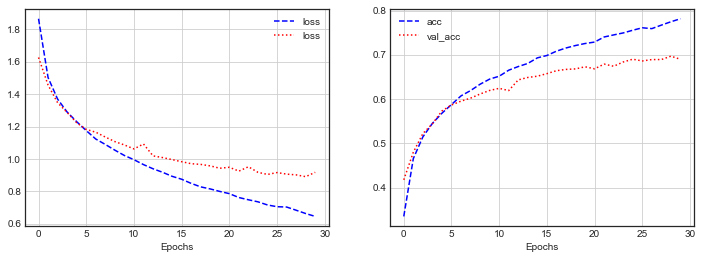

In [22]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'b--', label = 'acc')
plt.plot(history.history['val_acc'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()


- 해당 모델은 성능이 좋지 않음
- 규제화, 드롭아웃 등 과대적합을 방지하는 기술 필요

In [41]:
def model_build2():
    model = Sequential()
    
    input = Input(shape = (32, 32, 3))
    
    output = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')(input)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    output = Dropout(0.5)(output)
    
    
    # Fully-Connected Layer
    output = Flatten()(output)
    output = Dense(256, activation = 'relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(128, activation = 'relu')(output)
    output = Dense(10, activation = 'softmax')(output)
    
    model = Model(inputs = [input], outputs = output)
    
    model.compile(optimizer = Adam(learning_rate = 1e-4),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['acc'])
    
    return model

In [42]:
model = model_build2()
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0   

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [43]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 256,
                   validation_data = (x_val, y_val))

Epoch 1/30
137/137 [==============================] - 3s 19ms/step - loss: 2.5995 - acc: 0.2054 - val_loss: 2.2080 - val_acc: 0.2252
Epoch 2/30
137/137 [==============================] - 2s 16ms/step - loss: 1.9914 - acc: 0.2882 - val_loss: 1.9188 - val_acc: 0.3165
Epoch 3/30
137/137 [==============================] - 2s 16ms/step - loss: 1.8446 - acc: 0.3368 - val_loss: 1.6560 - val_acc: 0.4213
Epoch 4/30
137/137 [==============================] - 2s 16ms/step - loss: 1.7368 - acc: 0.3720 - val_loss: 1.5428 - val_acc: 0.4643
Epoch 5/30
137/137 [==============================] - 2s 15ms/step - loss: 1.6469 - acc: 0.4003 - val_loss: 1.4627 - val_acc: 0.4857
Epoch 6/30
137/137 [==============================] - 2s 15ms/step - loss: 1.5823 - acc: 0.4227 - val_loss: 1.4114 - val_acc: 0.5015
Epoch 7/30
137/137 [==============================] - 2s 16ms/step - loss: 1.5283 - acc: 0.4421 - val_loss: 1.3608 - val_acc: 0.5161
Epoch 8/30
137/137 [==============================] - 2s 16ms/step - 

### 학습 과정 시각화

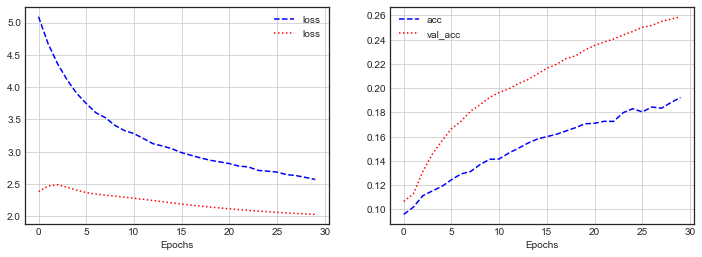

In [35]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'b--', label = 'acc')
plt.plot(history.history['val_acc'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [48]:
from tensorflow.keras.optimizers import Adadelta, Adagrad, Nadam

In [49]:
# Optimizer Nadam 적용

def lee_model():
    model = Sequential()
    
    input = Input(shape = (32, 32, 3))
    
    output = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')(input)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    
    output = Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')(output)
    output = Dropout(0.5)(output)
    
    
    # Fully-Connected Layer
    output = Flatten()(output)
    output = Dense(256, activation = 'relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(128, activation = 'relu')(output)
    output = Dense(10, activation = 'softmax')(output)
    
    model = Model(inputs = [input], outputs = output)
    
    model.compile(optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['acc'])
    
    return model

In [50]:
model = lee_model()
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)          0  

C:\Users\LEE\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [51]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 256, validation_data = (x_val, y_val))

## acc 0.6591  ->>   0.8603
## val_acc 0.6870  ->>  0.7954

### acc 21%, val_acc 11% 성능향싱시킴

Epoch 1/30
137/137 [==============================] - 5s 31ms/step - loss: 1.8119 - acc: 0.3578 - val_loss: 3.7044 - val_acc: 0.1541
Epoch 2/30
137/137 [==============================] - 4s 27ms/step - loss: 1.4090 - acc: 0.4895 - val_loss: 2.0677 - val_acc: 0.3768
Epoch 3/30
137/137 [==============================] - 4s 28ms/step - loss: 1.2114 - acc: 0.5682 - val_loss: 1.1447 - val_acc: 0.5868
Epoch 4/30
137/137 [==============================] - 4s 27ms/step - loss: 1.0786 - acc: 0.6179 - val_loss: 0.9881 - val_acc: 0.6561
Epoch 5/30
137/137 [==============================] - 4s 28ms/step - loss: 0.9857 - acc: 0.6554 - val_loss: 0.8660 - val_acc: 0.7036
Epoch 6/30
137/137 [==============================] - 4s 28ms/step - loss: 0.9185 - acc: 0.6796 - val_loss: 0.8354 - val_acc: 0.7171
Epoch 7/30
137/137 [==============================] - 4s 28ms/step - loss: 0.8546 - acc: 0.6990 - val_loss: 0.8226 - val_acc: 0.7141
Epoch 8/30
137/137 [==============================] - 4s 27ms/step - 

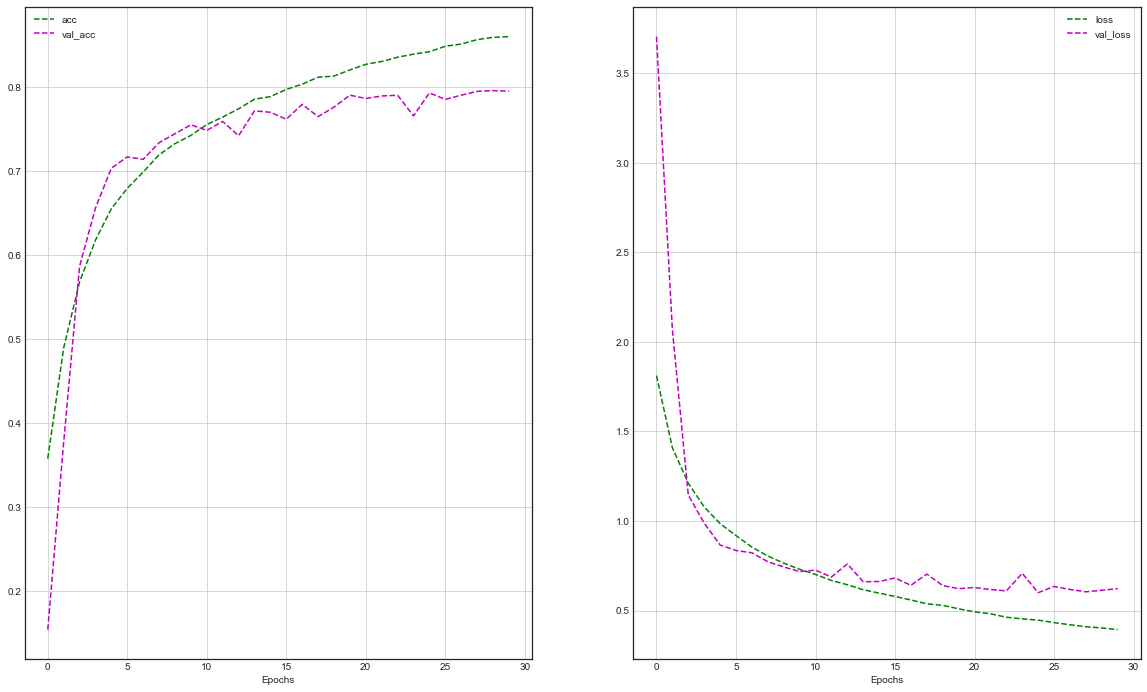

In [61]:
# 시각화
plt.figure(figsize = (20, 12))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], 'g--', label = 'acc')
plt.plot(history.history['val_acc'], 'm--', label = 'val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'g--', label = 'loss')
plt.plot(history.history['val_loss'], 'm--', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()